In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin=1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Data Understanding & Descriptive Statistics**
Objective:
Understand the overall structure, distribution, and scale of the dataset.

In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# **Data Quality Check (Null Values & Data Types)**
Objective:
Identify missing values and ensure correct data types for analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Convert Datatype of "Order date" & "ship date" from Object to Datetime

In [5]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df['Ship Date']= pd.to_datetime(df['Ship Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Date Feature Engineering
Objective:
Create time-based features to enable monthly and yearly analysis.

In [7]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order day of week'] = df['Order Date'].dt.dayofweek

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


# Monthly sales analysis
Objective:
Calculate total monthly sales and identify:
*   Highest sales month
*   Lowest sales month


In [9]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()

sales_by_month

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


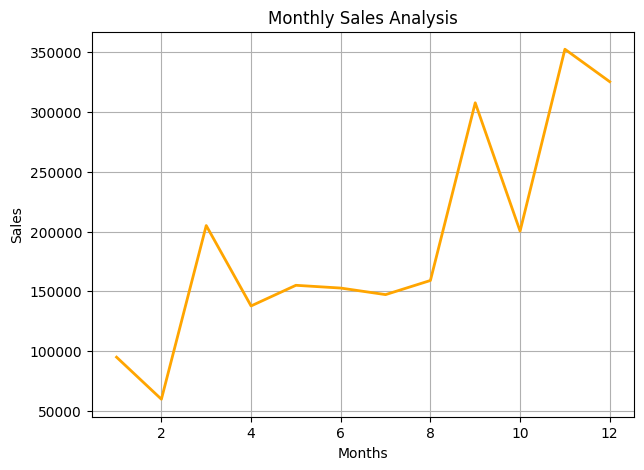

In [56]:
plt.figure(figsize=(7,5))
plt.plot(sales_by_month['Order Month'],
         sales_by_month['Sales'],
         color='orange',
         linewidth ='2')
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Monthly Sales Analysis")
plt.grid(True)
plt.show()

# **Sales Analysis by Category**
Objective:
Analyze sales distribution across categories and identify:
*   Highest sales category
*   Lowest sales category



In [13]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


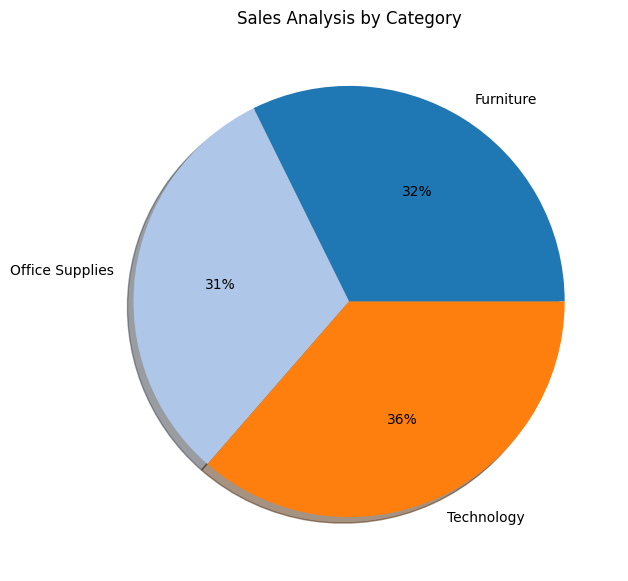

In [89]:
plt.figure(figsize=(7,7))
plt.pie(sales_by_category['Sales'],
        labels=sales_by_category['Category'],
        autopct='%1.0f%%',
        colors = plt.cm.tab20.colors,
        shadow=True)

plt.title("Sales Analysis by Category")
plt.show()

# **Sales Analysis by Sub-Category**
Objective:
Identify top and bottom performing sub-categories based on sales.

In [26]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_subcategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


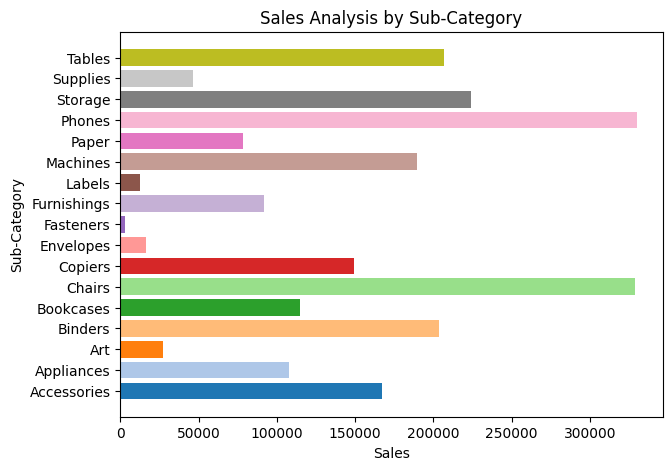

In [54]:
plt.figure(figsize=(7,5))
plt.barh(sales_by_subcategory['Sub-Category'],
         sales_by_subcategory['Sales'],
         color=plt.cm.tab20.colors)
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
plt.title("Sales Analysis by Sub-Category")
plt.show()


# **Monthly Profit Analysis**
Objective:
Analyze profit trends over months and identify the most profitable month.

In [39]:
profit_by_month =df.groupby('Order Month')['Profit'].sum().reset_index()
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


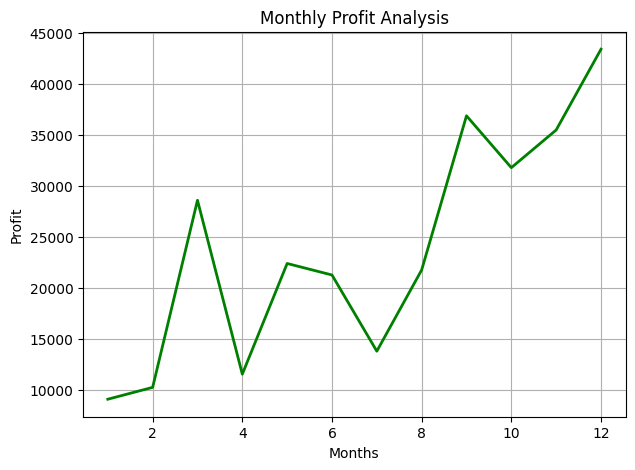

In [53]:
plt.figure(figsize=(7,5))
plt.plot(profit_by_month['Order Month'],
         profit_by_month['Profit'],
         color='green',
         linewidth ='2')
plt.xlabel("Months")
plt.ylabel("Profit")
plt.title("Monthly Profit Analysis")
plt.grid(True)
plt.show()

# **Profit Analysis by Category**
Objective:
Understand which categories drive profit and loss.

In [57]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


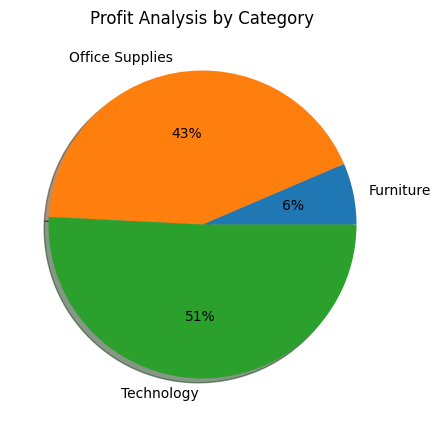

In [88]:
plt.figure(figsize=(5,5))
plt.pie(profit_by_category['Profit'],
        labels=profit_by_category['Category'],
        autopct='%1.0f%%',
        colors = plt.cm.tab10.colors,
        shadow=True)

plt.title("Profit Analysis by Category")
plt.show()

# **Profit Analysis by Sub-Category**
Objective:
Understand which sub-categories drive profit and loss.

In [68]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_by_subcategory

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


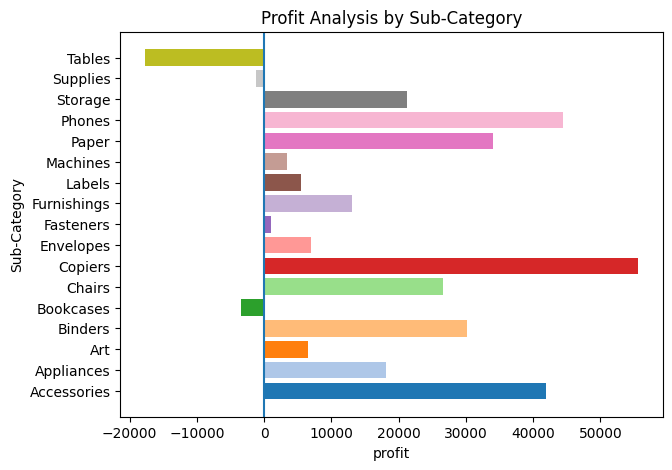

In [73]:
plt.figure(figsize=(7,5))
plt.barh(profit_by_subcategory['Sub-Category'],
         profit_by_subcategory['Profit'],
         color=plt.cm.tab20.colors)
plt.axvline(0)
plt.xlabel("profit")
plt.ylabel("Sub-Category")
plt.title("Profit Analysis by Sub-Category")
plt.show()

# **Sales and Profit Analysis by Customer Segment**
Objective:
Compare sales and profit across customer segments.

In [75]:
sales_profit_by_segment = (
    df.groupby('Segment')[['Sales', 'Profit']]
      .sum()
      .reset_index()
)
sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


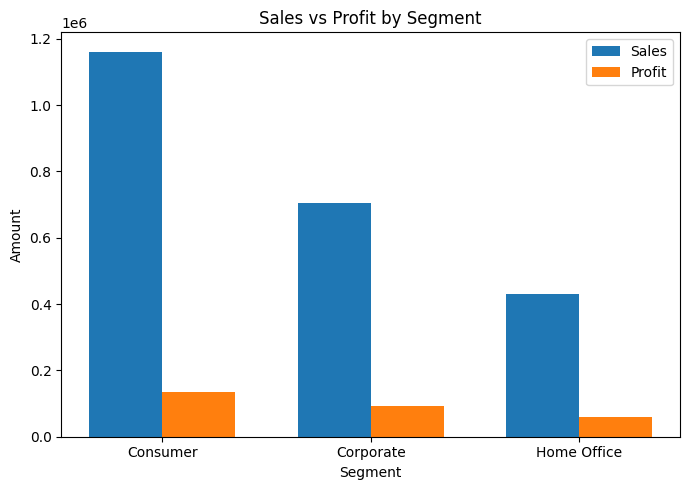

In [76]:
x = np.arange(len(sales_profit_by_segment))
width = 0.35

plt.figure(figsize=(7,5))

plt.bar(
    x - width/2,
    sales_profit_by_segment['Sales'],
    width,
    label='Sales'
)

plt.bar(
    x + width/2,
    sales_profit_by_segment['Profit'],
    width,
    label='Profit'
)

plt.xticks(x, sales_profit_by_segment['Segment'])
plt.xlabel("Segment")
plt.ylabel("Amount")
plt.title("Sales vs Profit by Segment")
plt.legend()

plt.tight_layout()
plt.show()

# **Yearly Sales & Profit Analysis**
Objective:
Understand long-term business growth trends.

In [81]:
yearly_sales_profit = df.groupby('Order Year')[['Sales', 'Profit']].sum().reset_index()
yearly_sales_profit

,Order Year,Sales,Profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


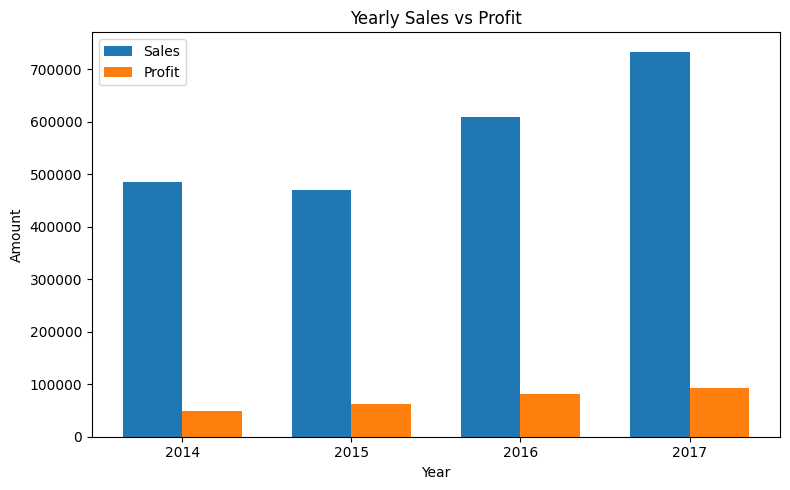

In [86]:
x = np.arange(len(yearly_sales_profit))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(x - width/2, yearly_sales_profit['Sales'], width, label='Sales')
plt.bar(x + width/2, yearly_sales_profit['Profit'], width, label='Profit')

plt.xticks(x, yearly_sales_profit['Order Year'])
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Yearly Sales vs Profit")
plt.legend()
plt.tight_layout()
plt.show()


# **Sales-to-Profit Ratio Analysis**
Objective:
Evaluate profitability efficiency of each customer segment.

In [87]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
